In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
sns.set_style("darkgrid")
plt.rcParams["font.family"] = "Times New Roman"

# Choose time interval

In [2]:
df = pd.read_csv('csv/cls_results_temp.csv')
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index, format=r"%Y-%m-%d_%H-%M-%S")
df.head()

,Model_name,Batch_size,Resolution,Dropout,lr,acc,In size,Training Epoch,Engine,angular_pixel_size_input_image,More,No. training,No. testing
date,,,,,,,,,,,,,
2024-02-17 19:15:33,EfficientNet-B1,128,240,0.5,0.0001,0.999075,NaN,20,PyTorch,0.00200,NaN,NaN,NaN
2024-02-17 19:36:18,EfficientNet-B1,128,240,0.5,0.0001,0.996670,NaN,20,PyTorch,0.00095,NaN,NaN,NaN
2024-02-17 19:42:42,EfficientNet-B1,128,240,0.5,0.0001,0.999075,NaN,20,PyTorch,0.00140,NaN,NaN,NaN
2024-02-17 20:01:58,EfficientNet-B1,128,240,0.5,0.0001,0.973363,NaN,20,PyTorch,0.00105,NaN,NaN,NaN
2024-02-17 20:08:25,EfficientNet-B1,128,240,0.5,0.0001,0.991676,NaN,20,PyTorch,0.00180,NaN,NaN,NaN


# temp

In [3]:
df_temp = df[['angular_pixel_size_input_image', 'acc']].copy()
df_temp

,angular_pixel_size_input_image,acc
date,,
2024-02-17 19:15:33,0.00200,0.999075
2024-02-17 19:36:18,0.00095,0.996670
2024-02-17 19:42:42,0.00140,0.999075
2024-02-17 20:01:58,0.00105,0.973363
2024-02-17 20:08:25,0.00180,0.991676
2024-02-17 20:14:51,0.00016,0.980755
2024-02-17 20:35:03,0.00080,0.997964
2024-02-17 20:54:05,0.00180,0.997409
2024-02-17 21:13:10,0.00170,0.996115


In [7]:
df_best = df_temp.groupby('angular_pixel_size_input_image').max()
df_best.head()

,acc
angular_pixel_size_input_image,
0.00005,0.880459
0.00006,0.900444
0.00007,0.918949
0.00008,0.940785
0.00009,0.957624


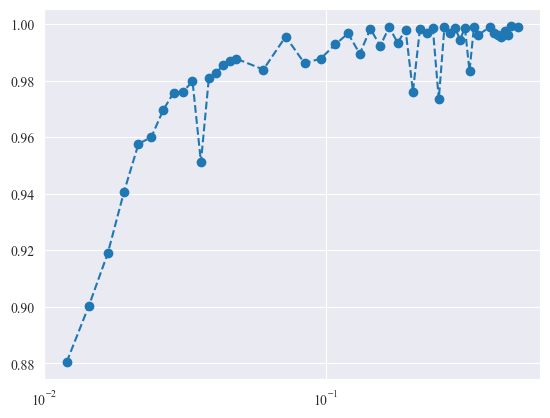

In [9]:
# df_best.sort_values(by='angular_pixel_size_input_image', inplace=True)
x = df_best.index * 240
y = df_best.acc
plt.plot(x, y, 'o--')
plt.xscale('log')
plt.show()

In [18]:
def error_bar(x):
    if x > 0.95:
        return np.random.uniform(0.005, 0.01)
    elif x > 0.9:
        return np.random.uniform(0.01, 0.02)
    else:
        return np.random.uniform(0.02, 0.03)
       

C:\Users\FYQ\AppData\Local\Temp\ipykernel_22072\3063378467.py:46: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


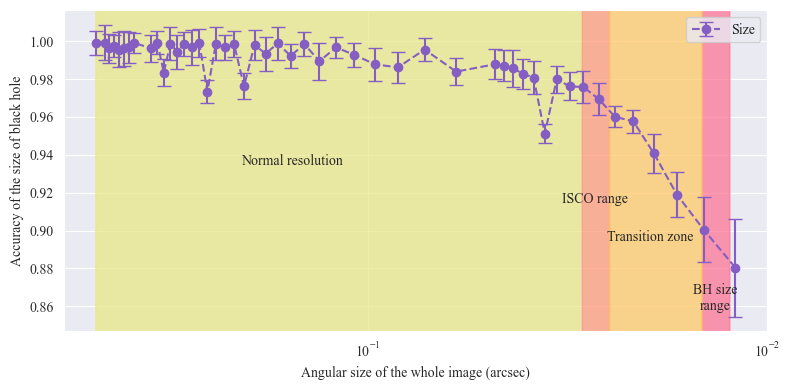

In [30]:

# x0 = 4.6e-5 * 3072 # upper bound
# x1 = 7.1e-5 * 3072 # lower bound
# x2 = 10.1e-5 * 3072 # ISCO
np.random.seed(2024)
upper = 5.16e-5 * 240 # upper bound
lower = 6.05e-5 * 240 # lower bound
ISCO_upper = 1.032e-4 * 240 # ISCO upper bound
ISCO_lower = 1.21e-4 * 240 # ISCO lower bound
error = list(map(error_bar, y))
fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
ax.errorbar(x, y, error, fmt='o--', capsize=5, color='#845EC2', label='Size')
# ax.grid()

el = Ellipse((2, -1), 0.5, 0.5)
num_points = 1000
xf = np.linspace(upper, lower, num_points)
y_upper = ax.get_ylim()[1]
y_lower = ax.get_ylim()[0]
yf1 = [y_upper+0.2]*num_points
yf0 = [y_lower-0.1]*num_points
ax.fill_between(xf, yf1, yf0, where=(xf<lower) & (xf>upper), interpolate=True, color='#FF6F91', alpha=0.7) # 

xf = np.linspace(ISCO_upper, ISCO_lower, num_points)
ax.fill_between(xf, yf1, yf0, where=(xf<ISCO_lower) & (xf>ISCO_upper), interpolate=True, color='#FF9671', alpha=0.7)

xf = np.linspace(lower, ISCO_upper, num_points)
ax.fill_between(xf, yf1, yf0, where=(xf<ISCO_upper) & (xf>lower), interpolate=True, color='#FFC75F', alpha=0.7)

xf = np.linspace(ISCO_lower, x.max(), num_points)
ax.fill_between(xf, yf1, yf0, where=(xf<x.max()) & (xf>ISCO_lower), interpolate=True, color='#E9E881', alpha=0.7)

ax.set_ylim([y_lower, y_upper])
ax.invert_xaxis()
ax.annotate('BH size\nrange', xy=(upper, y_upper), xytext=((upper + lower) / 2, y_upper - 0.16),
            horizontalalignment='center', verticalalignment='bottom')
ax.annotate(r'Transition zone', xy=(lower, y_upper), xytext=((lower + ISCO_upper) / 2, y_upper-0.12),
            horizontalalignment='center', verticalalignment='center')
ax.annotate(r'ISCO range', xy=(ISCO_upper, y_upper), xytext=((ISCO_upper + ISCO_lower) / 2, y_upper-0.1),
            horizontalalignment='center', verticalalignment='center')
ax.annotate(r'Normal resolution', xy=(ISCO_lower, y_upper), xytext=((ISCO_lower + x.max()) / 2-0.1, y_upper-0.08),
            horizontalalignment='center', verticalalignment='center')
ax.set_xlabel('Angular size of the whole image (arcsec)')
ax.set_ylabel('Accuracy of the size of black hole')
ax.set_xscale('log')
ax.legend()
fig.tight_layout()
plt.savefig('images/temp_vs_angular_size.png', dpi=600)
plt.savefig('images/temp_vs_angular_size.pdf')
plt.show()